In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

In [2]:
df = pd.read_csv("C:/Users/reall/OneDrive/Рабочий стол/us events ad_revenue filtered 03.02-07.02.csv")

In [3]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [4]:
def json_to_series(text):
    keys, values = zip(*json.loads(text).items())
    return pd.Series(values, index=keys)

In [5]:
result = pd.concat([df, df['event_json'].apply(json_to_series)], axis=1)

In [6]:
data = result.drop('event_json', axis = 1)

In [7]:
data.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_datetime,event_timestamp,event_receive_datetime,...,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,...,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,...,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,...,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,...,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,...,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


In [8]:
# Тут проверил наличие других возможных валют, кроме USD
data.currency.value_counts()

USD    860079
Name: currency, dtype: int64

In [9]:
data['ecpm'] = data.revenue * 1000
data

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_datetime,event_timestamp,event_receive_datetime,...,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId,ecpm
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,...,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ,0.510313
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,...,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ,0.510313
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,...,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58,2.386163
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,...,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364,13.893784
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,...,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw,6.827570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,2022-02-03 08:29:27,1643866167,2022-02-03 08:29:37,...,0.080914,0.080914,0.000020,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,165277,0.019972
860075,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,2022-02-03 02:12:51,1643843571,2022-02-03 02:14:48,...,3.379858,3.379858,0.006740,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMeYrb2S4vUCFZWVyAodrPYHvA,6.740355
860076,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,2022-02-03 02:13:06,1643843586,2022-02-03 02:14:48,...,3.319878,3.319878,0.002780,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/4884242584,CNrdyMCS4vUCFRNXcgodTqsMOA,2.780058
860077,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,2022-02-03 02:13:17,1643843597,2022-02-03 02:14:48,...,3.265896,3.265896,0.002780,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/4884242584,CJnr0ciS4vUCFQ7HhwodgC8HVw,2.780058


In [10]:
data['event_datetime'] = pd.to_datetime(data['event_datetime'])

In [11]:
data['time_hour'] = data['event_datetime'].dt.strftime('%H')

In [12]:
data.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_datetime,event_timestamp,event_receive_datetime,...,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId,ecpm,time_hour
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,...,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ,0.510313,20
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,...,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ,0.510313,20
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,...,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58,2.386163,17
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,...,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364,13.893784,17
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,...,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw,6.827570,17


In [13]:
# Кроме колонки Города и Оператора, нигде больше пропусков не наблюдается
data.isnull().sum()

profile_id                     14
os_version                      0
device_manufacturer             0
device_model                    0
device_type                     0
device_locale                   0
event_name                      0
event_datetime                  0
event_timestamp                 0
event_receive_datetime          0
event_receive_timestamp         0
connection_type                 0
operator_name               18879
country_iso_code                0
city                       323708
ad_type                         0
placement                       0
view_index                      0
session_view_index              0
cur_ticks                       0
session_length                  0
revenue                         0
ads_ltv                         0
ecpm_sma                        0
normalized_ecpm_sma             0
value                           0
currency                        0
ad_country_code                 0
network_name                    0
ad_unit_id    

<AxesSubplot:xlabel='ad_type', ylabel='ecpm'>

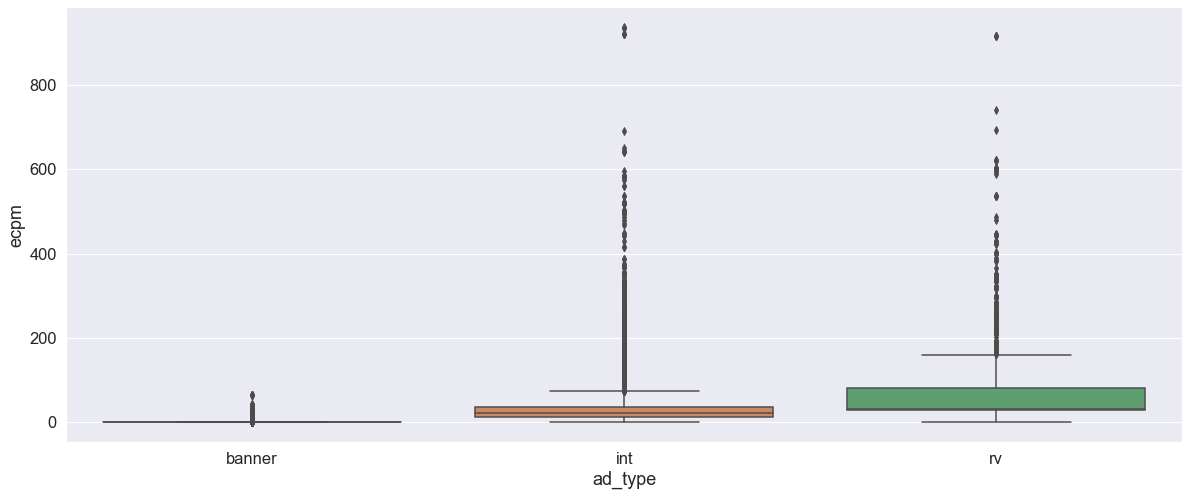

In [104]:
# Проверил распределения на наличие выбросов, оказалось, что по каждому из видов рекламы довольно велико валовое количество выбросов, выше 95%
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(figsize=(20,8))
sns.boxplot(y = 'ecpm', x = 'ad_type', data = data, ax = axes)

In [178]:
#Средний ECPM по пользователям с ограничением по 0.95 квартилю для нивелирования выбросов
data11 = data[data['ad_type'] == 'banner']
data11 = data11[data11['ecpm'] < data11.ecpm.quantile([0.95]).iloc[0]]
data12 = data[data['ad_type'] == 'int']
data12 = data12[data12['ecpm'] < data12.ecpm.quantile([0.95]).iloc[0]]
data13 = data[data['ad_type'] == 'rv']
data13 = data13[data13['ecpm'] < data13.ecpm.quantile([0.95]).iloc[0]]

[Text(0.5, 1.0, 'Средний ECPM пользователя (rv)')]

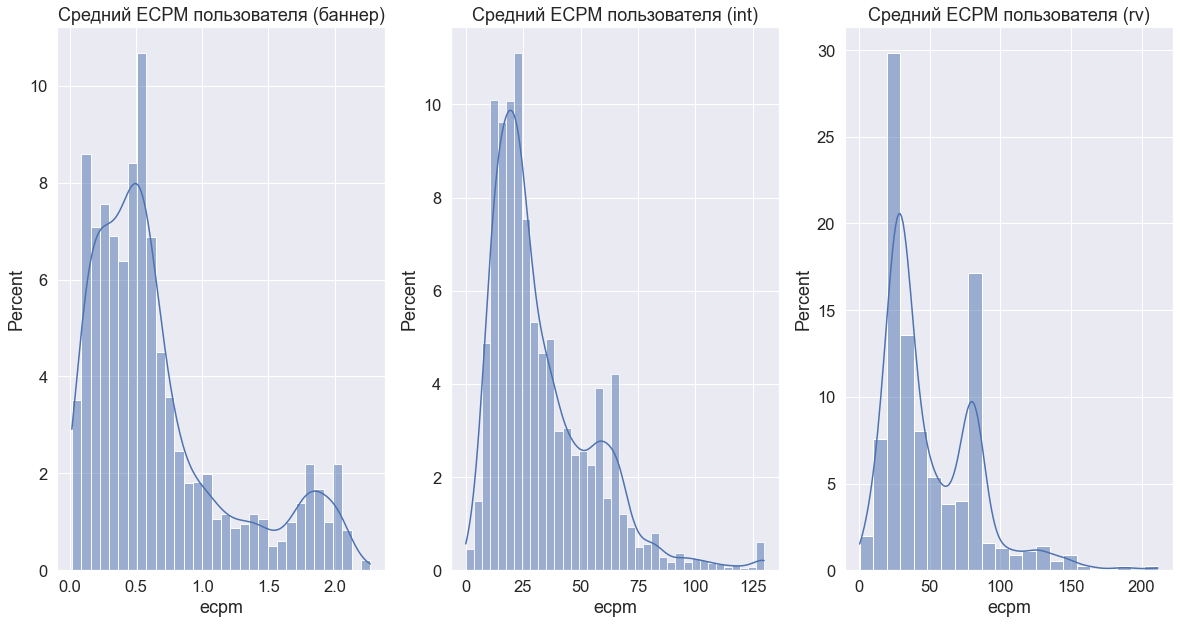

In [179]:
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
sns.histplot(x = (data11.groupby(['profile_id']).mean()['ecpm']), kde=True, ax = axes[0], stat="percent").set(title='Средний ECPM пользователя (баннер)')
sns.histplot(x = (data12.groupby(['profile_id']).mean()['ecpm']), kde=True, ax = axes[1], stat="percent").set(title='Средний ECPM пользователя (int)')
sns.histplot(x = (data13.groupby(['profile_id']).mean()['ecpm']), kde=True, ax = axes[2], stat="percent").set(title='Средний ECPM пользователя (rv)')

In [201]:
print('med_int:', np.median(np.array(data12.groupby(['profile_id']).mean()['ecpm'])))
print('med_rv: ', np.median(np.array(data13.groupby(['profile_id']).mean()['ecpm'])))

med_int: 25.463837146759076
med_rv:  35.2577351351351


In [195]:
import scipy
scipy.stats.ttest_ind(np.array(data12.groupby(['profile_id']).mean()['ecpm']) ,np.array(data13.groupby(['profile_id']).mean()['ecpm']))

Ttest_indResult(statistic=-20.088397660503635, pvalue=2.5649250555549034e-86)

В целом можно сказать, что распределение баннеров - лог нормальное и довольно сильно отличается от остальных двух, поэтому сравнивать с другими особо смысла нет. Распределение же int и rv довольно близки к нормальным со смещением в правую сторону, также ввиду относительной схожести их медиан, проверил их на t тесте, который показал p-value гораздо меньше 0.05, что говорит о том, что мат. ожидания этих двух выборок - статистически различаются.

C:\Users\reall\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ecpm'>

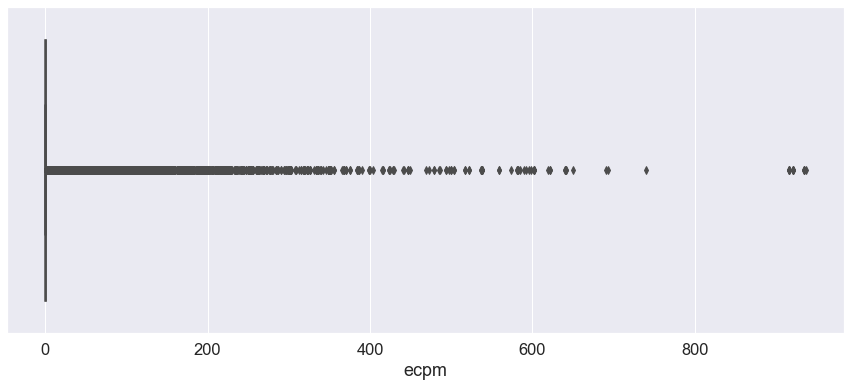

In [86]:
fig, axes = plt.subplots(figsize=(15, 6))
sns.boxplot(data['ecpm'], ax = axes)

In [117]:
data2 = data[data['city'].isna() == False]

In [226]:
# Так как уникальных городов больше 800, то возьмем 10 наиболее встречающихся
top10city = list(data2.city.value_counts().iloc[:10].index)
data2.city.value_counts()

New York       16796
Minneapolis    12207
Springfield     9845
Houston         9552
Charlotte       9228
               ...  
Canfield           1
Escanaba           1
Kingston           1
Pikesville         1
Swedesboro         1
Name: city, Length: 854, dtype: int64

In [227]:
data21 = data11[data11['city'].isna() == False]
data21 = data21[data21.city.isin(top10city)]
data22 = data12[data12['city'].isna() == False]
data22 = data22[data22.city.isin(top10city)]
data23 = data13[data13['city'].isna() == False]
data23 = data23[data23.city.isin(top10city)]

In [121]:
data['os_version'].value_counts()

12       407587
11       209071
10       150871
9         66662
8.1.0      9249
8.0.0      8016
7.0        4057
7.1.2      1811
7.1.1      1342
5.0.2       709
6.0.1       704
Name: os_version, dtype: int64

[Text(0.5, 0, 'Версия ОС'),
 Text(0.5, 1.0, 'Распределение ECPM по ОС (Баннер)')]

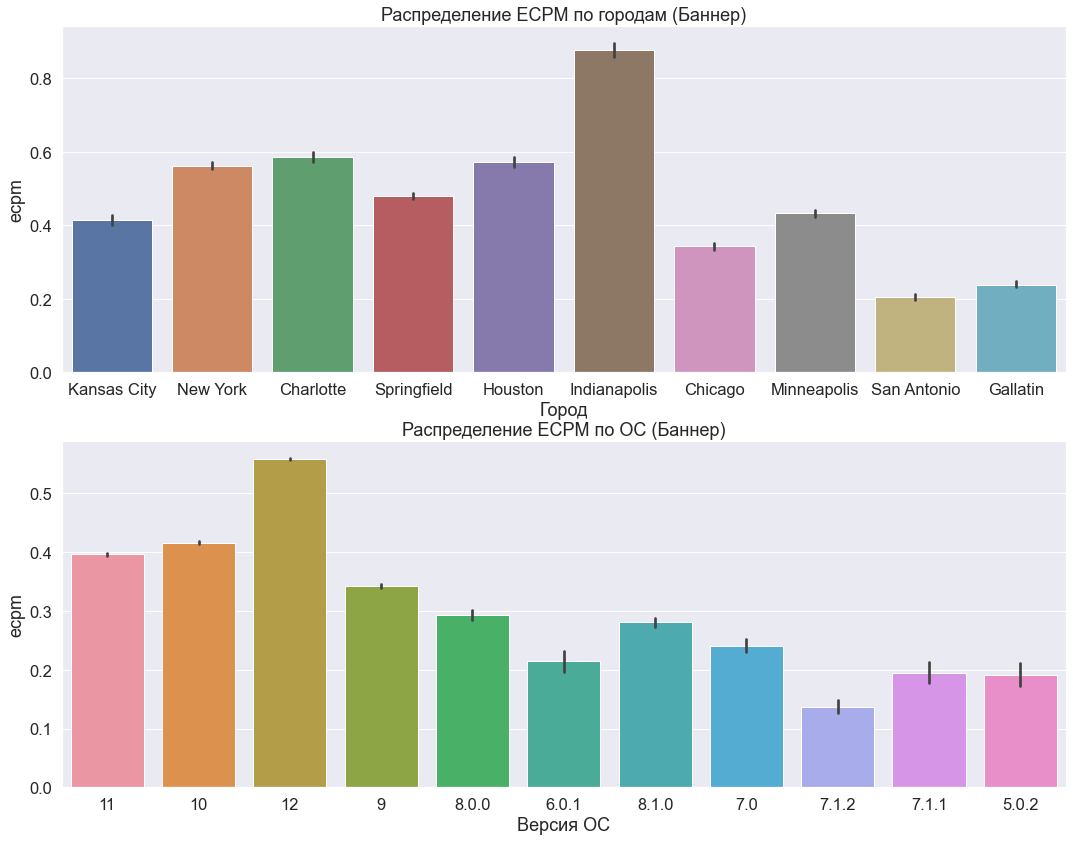

In [225]:
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(2, 1, figsize=(18, 14))
sns.barplot(x = 'city', y = 'ecpm', data = data21, ax = axes[0]).set(xlabel = "Город", title = 'Распределение ECPM по городам (Баннер)')
sns.barplot(x = 'os_version', y = 'ecpm', data = data11, ax = axes[1]).set(xlabel = "Версия ОС", title = 'Распределение ECPM по ОС (Баннер)')


Для Баннеров можно увидеть, все бары имеют довольно маленький доверительный интервал - в пределах 2-4%, что говорит о довольно плотных выборках для этих величин. Самый высокий уровень ecpm показывает имеет город Индианаполис, более чем $0.8 за 1000 показов, а для ОС, самый высокий уровень - у последней версии ОС.

[Text(0.5, 0, 'Версия ОС'), Text(0.5, 1.0, 'Распределение ECPM по ОС (int)')]

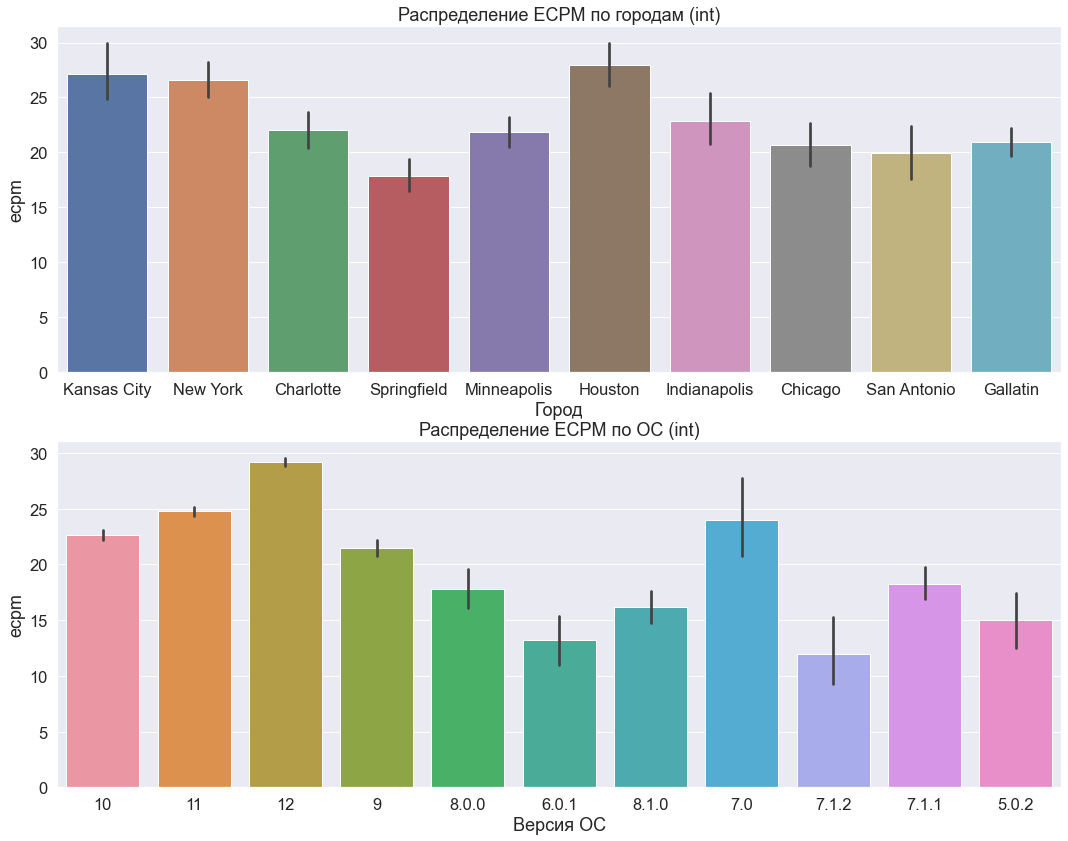

In [224]:
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(2, 1, figsize=(18, 14))
sns.barplot(x = 'city', y = 'ecpm', data = data22, ax = axes[0]).set(xlabel = "Город", title = 'Распределение ECPM по городам (int)')
sns.barplot(x = 'os_version', y = 'ecpm', data = data12, ax = axes[1]).set(xlabel = "Версия ОС", title = 'Распределение ECPM по ОС (int)')

Ситуация несильно меняется для типа рекламы int, однако для данного типа рекламы уровень доверительного интервала, в среднем, выше, что говорит о меньшей статистической значимости данных и их меньшей мощности.

[Text(0.5, 0, 'Версия ОС'), Text(0.5, 1.0, 'Распределение ECPM по ОС (rv)')]

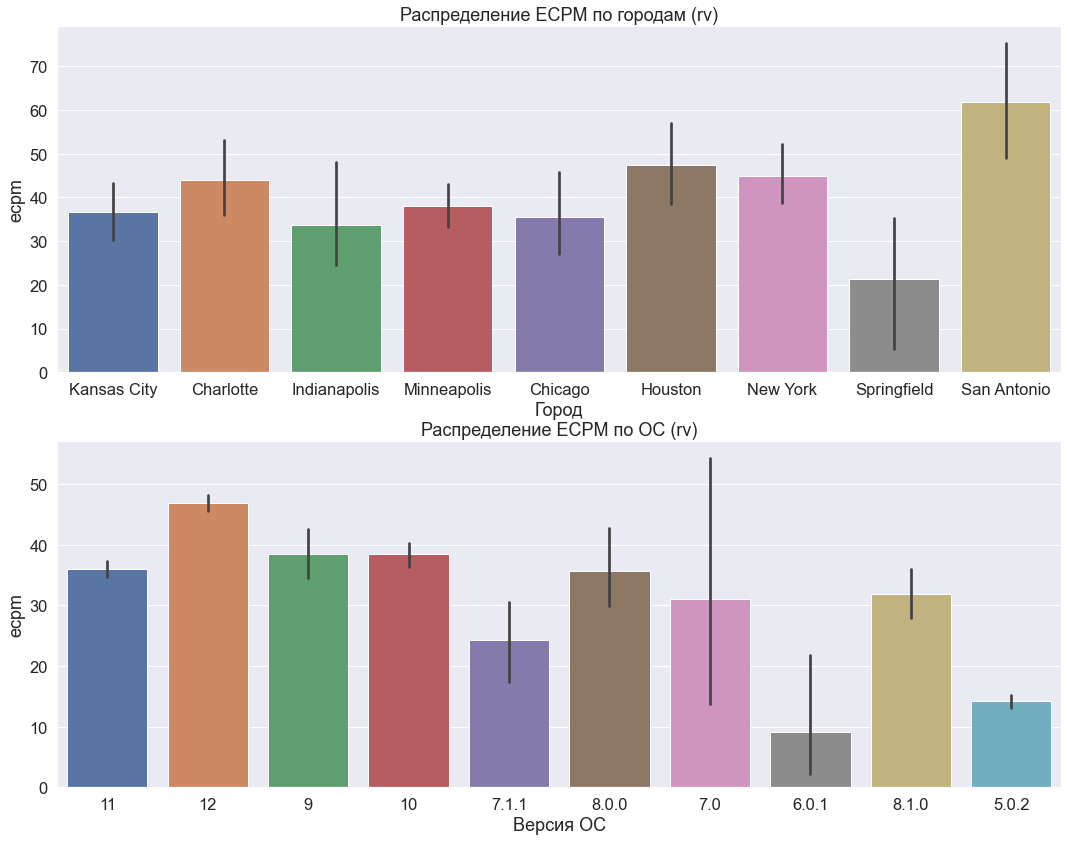

In [216]:
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(2, 1, figsize=(18, 14))
sns.barplot(x = 'city', y = 'ecpm', data = data23, ax = axes[0]).set(xlabel = "Город", title = 'Распределение ECPM по городам (rv)')
sns.barplot(x = 'os_version', y = 'ecpm', data = data13, ax = axes[1]).set(xlabel = "Версия ОС", title = 'Распределение ECPM по ОС (rv)')

Для типа рекламы rv выборка данных еще менее мощная, о чем говорит довольно высокий уровень доверительных интервалов (что мы наблюдали в предыдущем задании). Подытоживая, можно говорить, что вне зависимости от города, для каждого типа рекламы справедливо, что чем выше версия ОС, тем выше ecpm.

In [217]:
data31 = pd.DataFrame(data[data.ad_type == 'banner'].groupby('city').sum()['revenue'])
data32 = pd.DataFrame(data[data.ad_type == 'banner'].groupby('os_version').sum()['revenue'])
data33 = pd.DataFrame(data[data.ad_type == 'int'].groupby('city').sum()['revenue'])
data34 = pd.DataFrame(data[data.ad_type == 'int'].groupby('os_version').sum()['revenue'])
data35 = pd.DataFrame(data[data.ad_type == 'rv'].groupby('city').sum()['revenue'])
data36 = pd.DataFrame(data[data.ad_type == 'rv'].groupby('os_version').sum()['revenue'])

In [219]:
top10city2 = list(data.groupby('city').sum()['revenue'].sort_values(ascending = False).iloc[:10].index)

data31['city'] = data31.index
data31 = data31[data31['city'].isin(top10city2)]
data32['os_version'] = data32.index

data33['city'] = data33.index
data33 = data33[data33['city'].isin(top10city2)]
data34['os_version'] = data34.index

data35['city'] = data35.index
data35 = data35[data35['city'].isin(top10city2)]
data36['os_version'] = data36.index

[Text(0.5, 0, 'Версия ОС'),
 Text(0.5, 1.0, 'Распределение дохода по ОС (баннер)')]

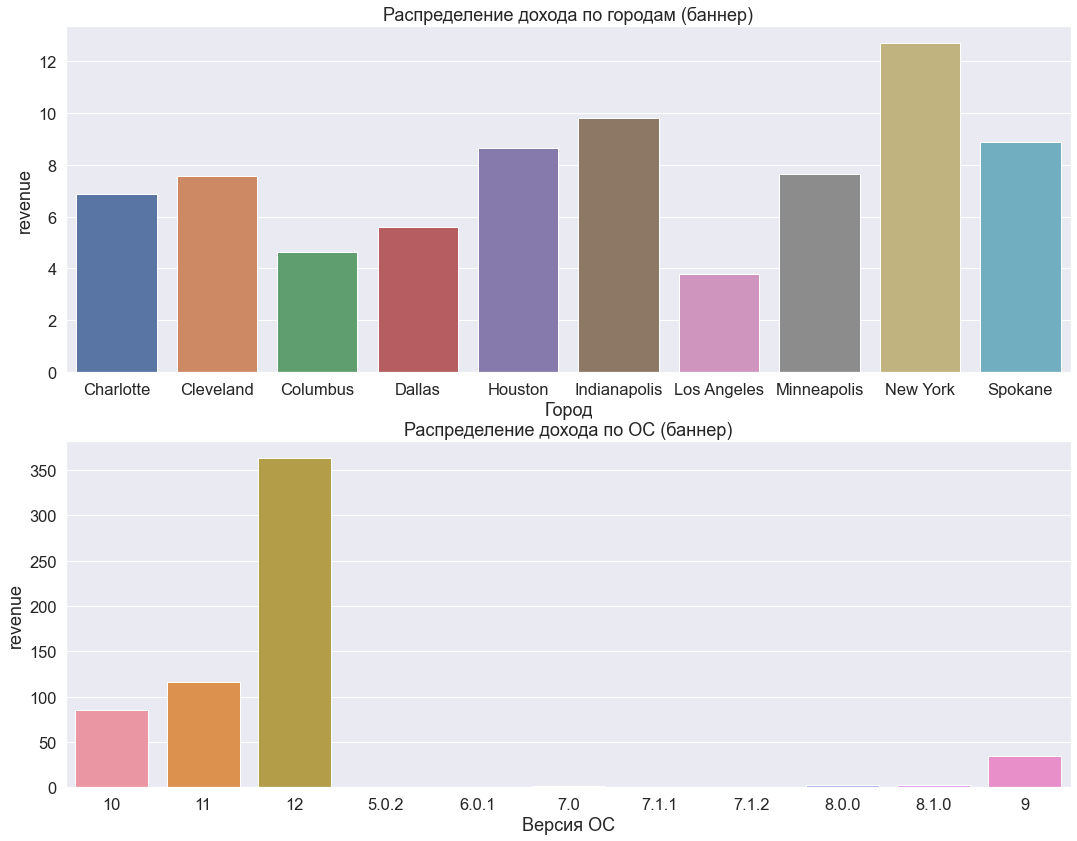

In [221]:
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(2, 1, figsize=(18, 14))
sns.barplot(x = 'city', y = 'revenue', data = data31, ax = axes[0]).set(xlabel = "Город", title = 'Распределение дохода по городам (баннер)')
sns.barplot(x = 'os_version', y = 'revenue', data = data32, ax = axes[1]).set(xlabel = "Версия ОС", title = 'Распределение дохода по ОС (баннер)')

[Text(0.5, 0, 'Версия ОС'), Text(0.5, 1.0, 'Распределение дохода по ОС (int)')]

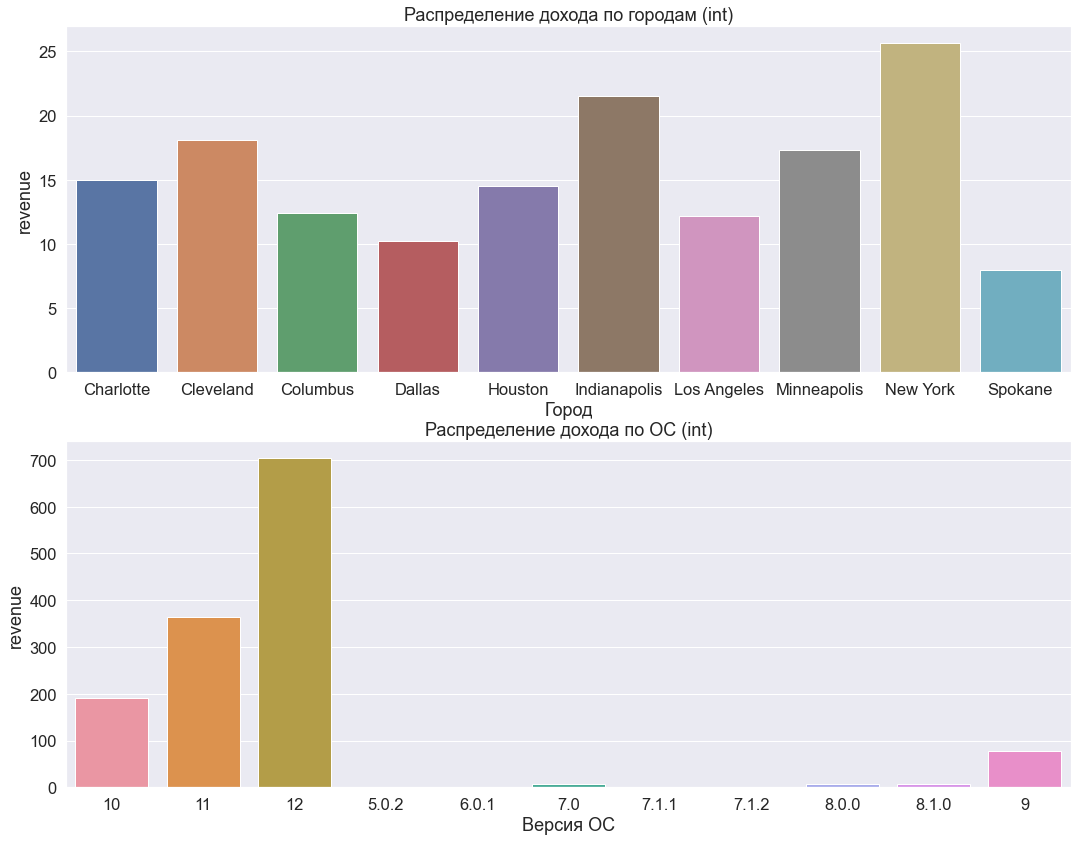

In [222]:
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(2, 1, figsize=(18, 14))
sns.barplot(x = 'city', y = 'revenue', data = data33, ax = axes[0]).set(xlabel = "Город", title = 'Распределение дохода по городам (int)')
sns.barplot(x = 'os_version', y = 'revenue', data = data34, ax = axes[1]).set(xlabel = "Версия ОС", title = 'Распределение дохода по ОС (int)')

[Text(0.5, 0, 'Версия ОС'), Text(0.5, 1.0, 'Распределение дохода по ОС (rv)')]

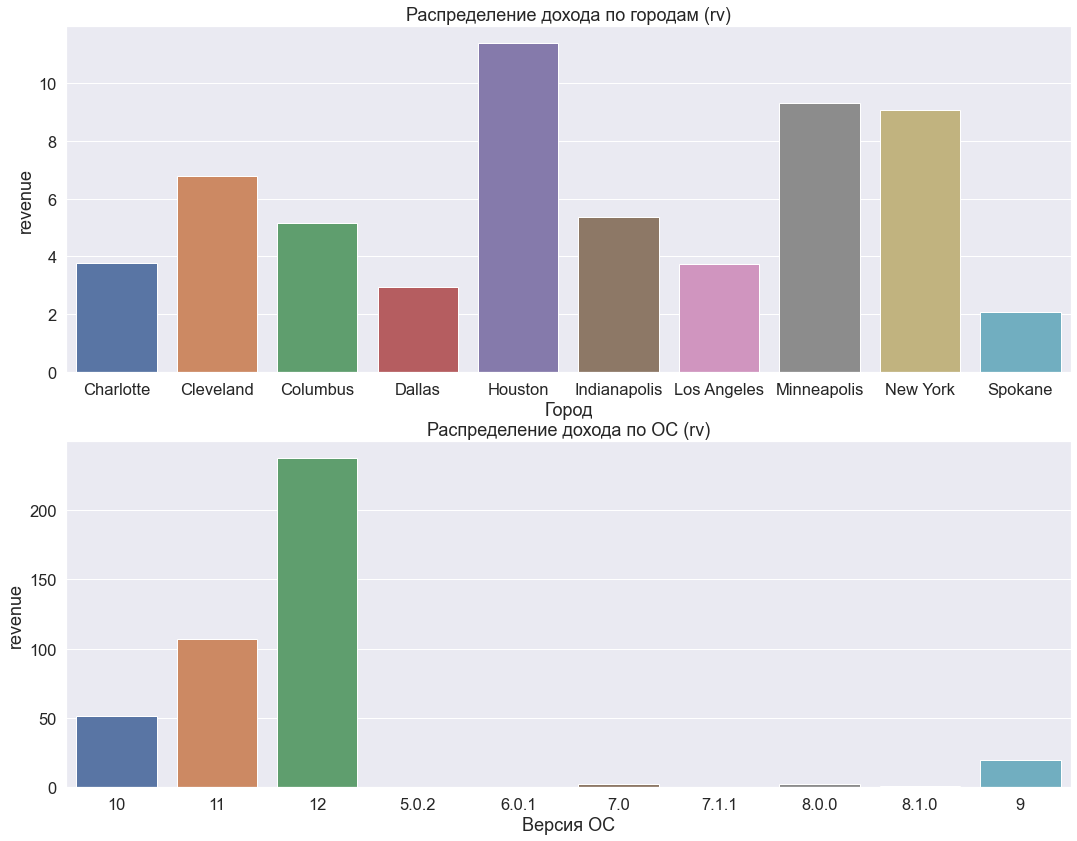

In [223]:
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(2, 1, figsize=(18, 14))
sns.barplot(x = 'city', y = 'revenue', data = data35, ax = axes[0]).set(xlabel = "Город", title = 'Распределение дохода по городам (rv)')
sns.barplot(x = 'os_version', y = 'revenue', data = data36, ax = axes[1]).set(xlabel = "Версия ОС", title = 'Распределение дохода по ОС (rv)')

По всем типам рекламы - ситуация довольно схожая, в топе городов: Нью-Йорк, Миннеаполис, Индианаполис и Хьюстон. Что же касается ОС, то тут довольно очевидная ситуация - 9, 10, 11, 12 по возрастающей, все что до этих версий - прибыли не приносит.

In [165]:
print("Процент доходов с информацией о Городе: ",  round((np.size(data[data['city'].isna() == False].index))*100.00/np.size(data.index), 2),'%')

Процент доходов с информацией о Городе:  62.36 %


In [171]:
data4 = pd.DataFrame(data2к.groupby('time_hour').mean()['ecpm'])
data4['time_hour'] = data4.index
data4

,ecpm,time_hour
time_hour,,
00,0.745859,00
01,0.802850,01
02,0.702910,02
03,0.652552,03
04,0.663088,04
05,0.782704,05
06,0.686589,06
07,0.688230,07
08,0.934571,08


<AxesSubplot:xlabel='time_hour', ylabel='ecpm'>

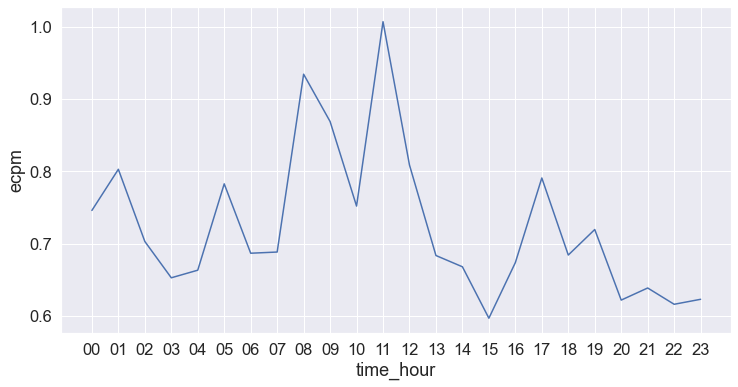

In [172]:
sns.set(font_scale = 1.5)
fig, axes = plt.subplots( figsize=(12, 6))
sns.lineplot(data = data4, x = 'time_hour', y = 'ecpm', ax = axes)

Сложно говорить о точной зависимости, но можно с уверенностью сказать, что наиболее прибыльное время для компании, когда средний ECPM - наибольший - это промежуток с 8 до 12 утра.